<b><font size="6" color="red">ch13_데이터 시각화 </font></b>

In [23]:
# 시작전 설정
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'
#한글설정
plt.rc('font', family='Malgun Gothic')
#plt.rc('axes',unicode_minus=False)
#경고 메세지 안보이게 하기
import warnings
warnings.filterwarnings(action='ignore')

# 3절 Seaborn
    - matplotblib을 기반으로 만든 고수준 그래픽 라이브러리
      * 공식사이트 :  https://seaborn.pydata.org/
      * seaborn API :  https://seaborn.pydata.org/api.html
    - Seaborn으로 그래프를 그리기 위해서 다음 단계를 따릅니다.
        1) 데이터 준비
        2) 미적속성 설정
        3) 함수를 이용하여 그래프 그리기
        4) 그래프 출력, 저장

## 3.1 데이터 준비하기

In [3]:
import seaborn as sns
iris = sns.load_dataset('iris')
iris.shape

(150, 5)

In [4]:
iris.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


In [5]:
iris.info() #iris열의 dtype, 전체 행수, 열별 결측치를 제외한 갯수, 메모리 사용량

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
iris.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [8]:
iris.describe(include='all')

,sepal_length,sepal_width,petal_length,petal_width,species
count,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,versicolor
freq,NaN,NaN,NaN,NaN,50
mean,5.843333,3.057333,3.758000,1.199333,NaN
std,0.828066,0.435866,1.765298,0.762238,NaN
min,4.300000,2.000000,1.000000,0.100000,NaN
25%,5.100000,2.800000,1.600000,0.300000,NaN
50%,5.800000,3.000000,4.350000,1.300000,NaN
75%,6.400000,3.300000,5.100000,1.800000,NaN


In [9]:
titanic = sns.load_dataset('titanic')
titanic.head()
# survived 생존여부, pclass 티켓클래스1,2,3등석, sibsp: 함께 탑승한 형제나 배우자수
# parch: 함께 탑승한 부모, 아이수, fare:탑승료

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [10]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [11]:
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

## 3.2 미적 속성 설정하기(style, context, palette)
### 1) 그래프 스타일 지정

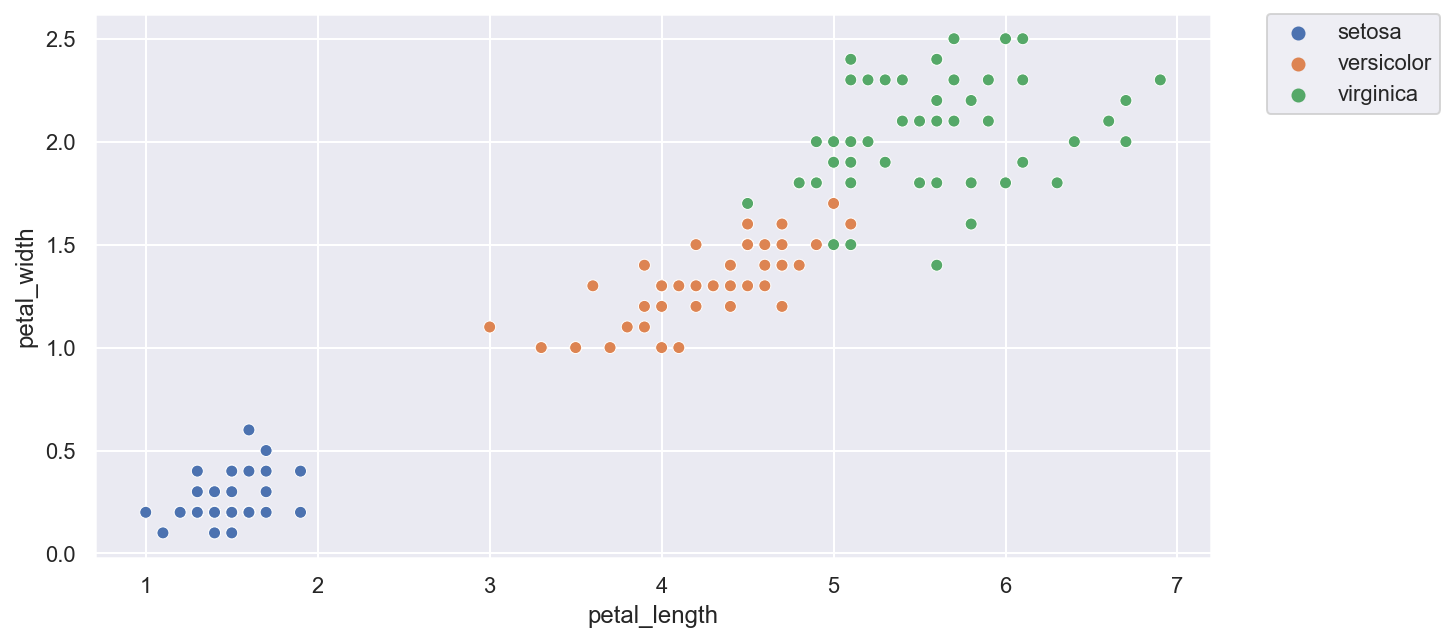

In [19]:
plt.figure(figsize=(10,5))
sns.set(style='darkgrid') #darkgrid, whitegride, dark, white, ticks
sns.scatterplot(data=iris, x='petal_length', y='petal_width',hue= 'species')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

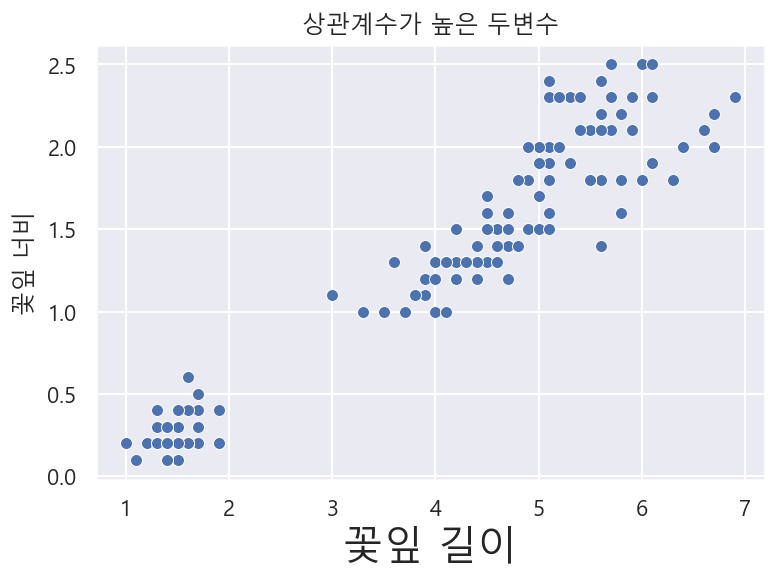

In [24]:
plt.rc('font', family='Malgun Gothic')
ax = sns.scatterplot(data=iris, x='petal_length', y='petal_width')
ax.set(title='상관계수가 높은 두변수',
       ylabel='꽃잎 너비')
ax.set_xlabel('꽃잎 길이', fontsize=20)
plt.show()

### 2) 컨텍스트 지정(비율)

<AxesSubplot:xlabel='petal_length', ylabel='petal_width'>

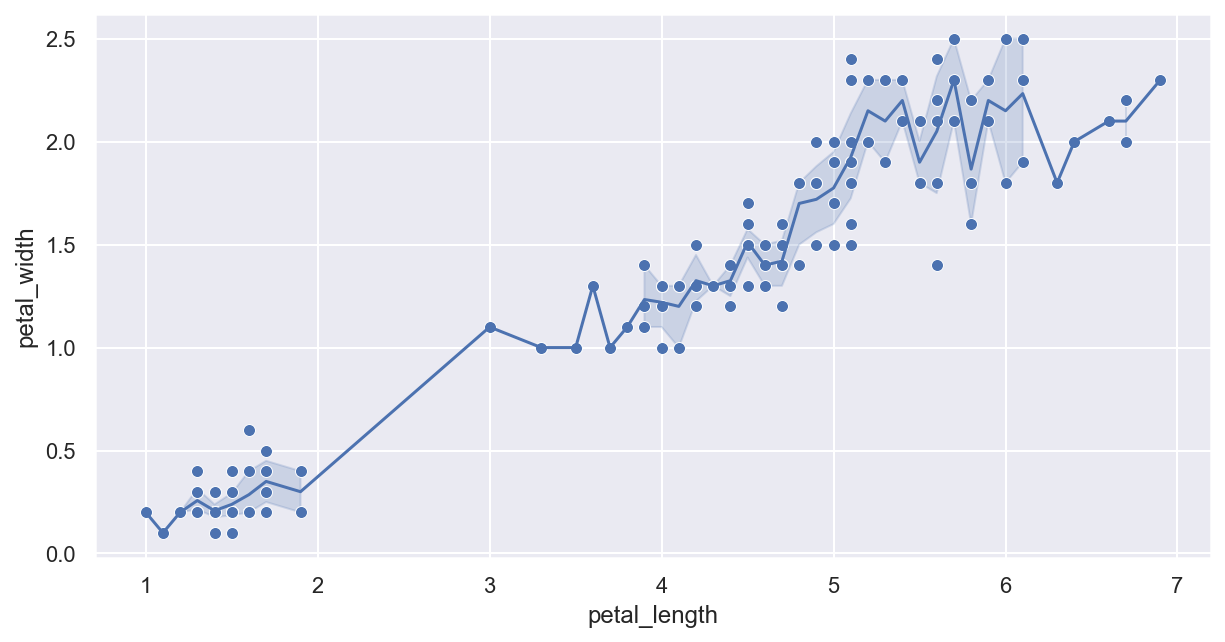

In [26]:
plt.figure(figsize=(10,5))
sns.set_context('notebook')
# notebook(기본값: 1배율, paper:0.8, talk:1.3, poster:1.8)
sns.lineplot(data=iris, x='petal_length', y='petal_width')
sns.scatterplot(data=iris, x='petal_length', y='petal_width')

### 3) 컬러 팔레트
- https://seaborn.pydata.org/generated/seaborn.color_palette.html#seaborn.color_palette
- https://matplotlib.org/tutorials/colors/colormaps.html
- https://seaborn.pydata.org/tutorial/color_palettes.html
- http://hleecaster.com/wp-content/uploads/2019/12/article2_image9.png

<AxesSubplot:xlabel='petal_length', ylabel='petal_width'>

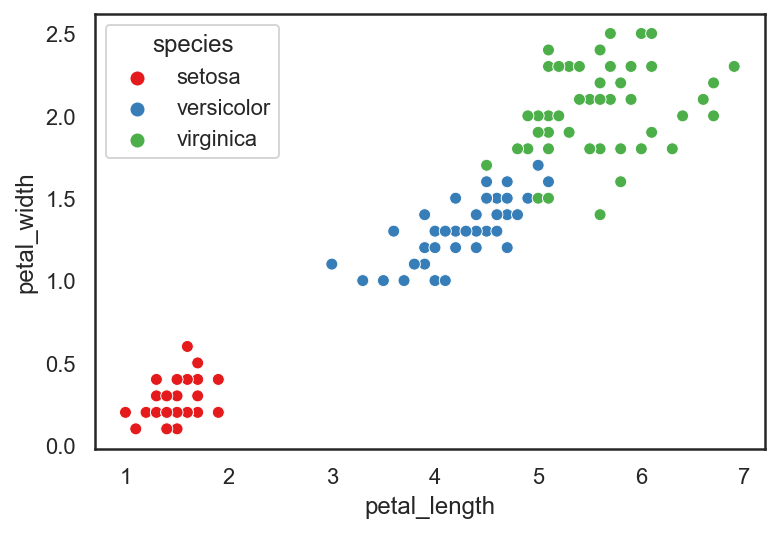

In [28]:
sns.set(palette='Set1', style='white')
sns.scatterplot(data=iris, x='petal_length', y='petal_width', hue='species')

<AxesSubplot:xlabel='petal_length', ylabel='petal_width'>

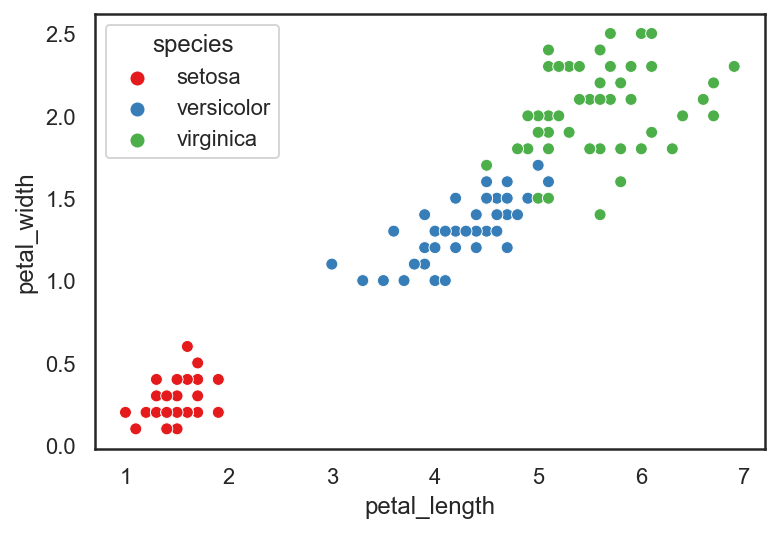

In [31]:
sns.set_palette('Set1',3) # 3: 기본사이클 수
# deep/muted/bright/pastel/dark 등,... 기본파레트 (사이트 참조)
sns.scatterplot(data=iris, x='petal_length', y='petal_width', hue='species')

## 3.3 Seaborn 함수로 그래프 그리기

### 1) Relational plots : 관계형 그래프
     * scatterplot, lineplot, relplot(서브플롯 제공)

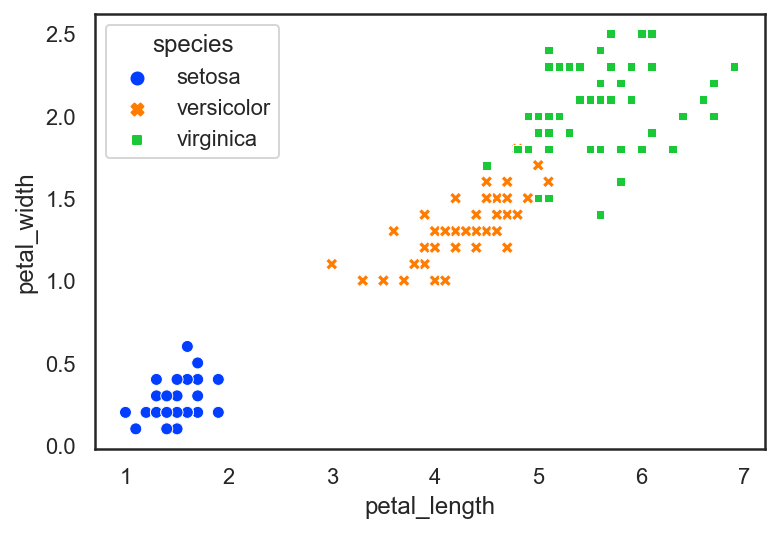

In [36]:
# 종별 다른 색상과 스타일의 scatterplot
sns.scatterplot(data=iris, x='petal_length', y='petal_width', hue ='species',
               palette='bright', style='species')
plt.show()

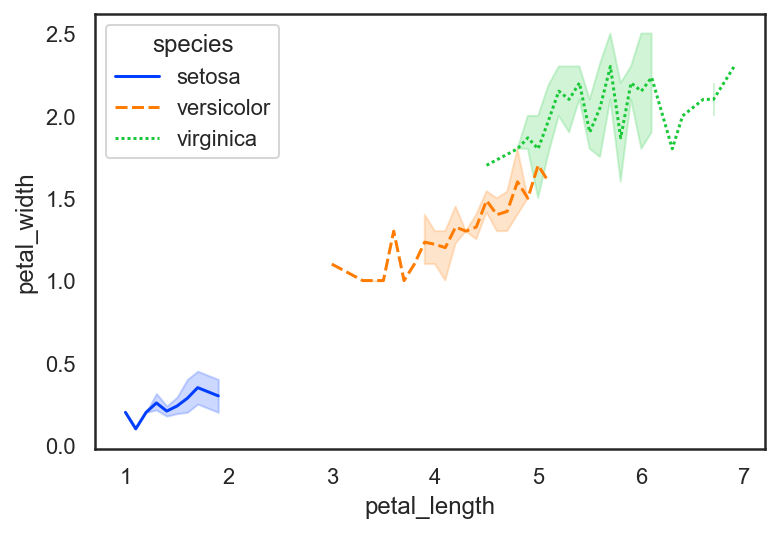

In [37]:
# 종별 다른 색상과 스타일의 lineplot
sns.lineplot(data=iris, x='petal_length', y='petal_width', hue ='species',
               palette='bright', style='species')
plt.show()

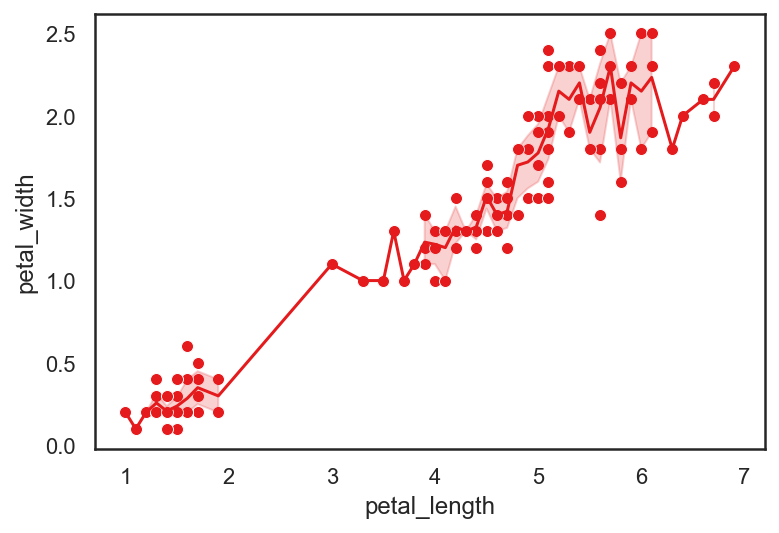

In [39]:
sns.scatterplot(data=iris, x='petal_length', y='petal_width')
sns.lineplot(data=iris, x='petal_length', y='petal_width')
plt.show()

<AxesSubplot:xlabel='petal_length', ylabel='petal_width'>

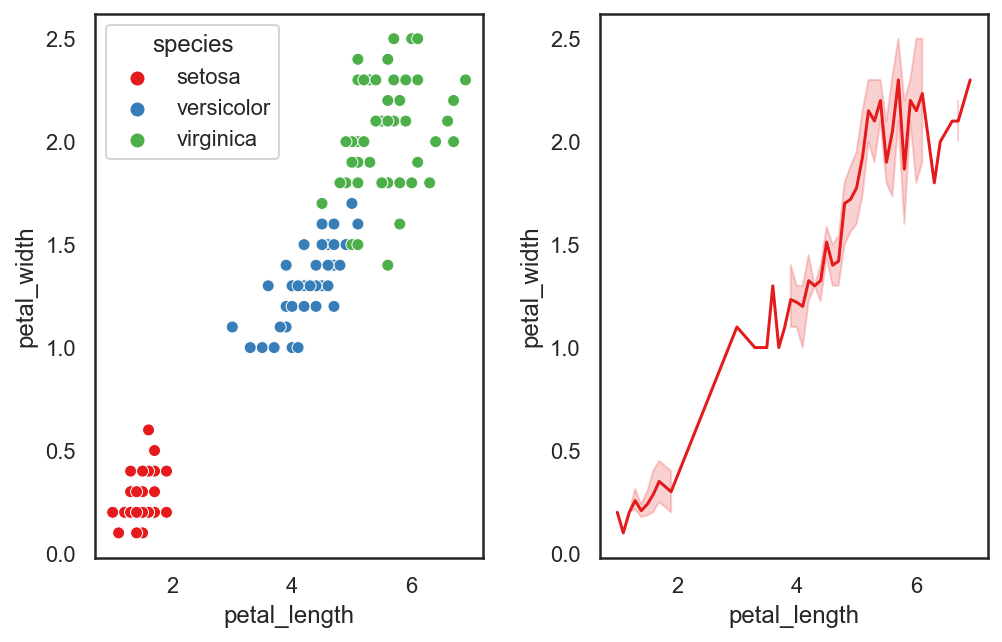

In [42]:
fig, axes = plt.subplots(ncols=2, figsize=(8,5))
plt.subplots_adjust(wspace=0.3) #서브플롯 사이의 패딩 너비 조정
sns.scatterplot(data=iris, x='petal_length',y='petal_width', hue='species', ax=axes[0])
sns.lineplot(data=iris, x='petal_length', y='petal_width',ax=axes[1])

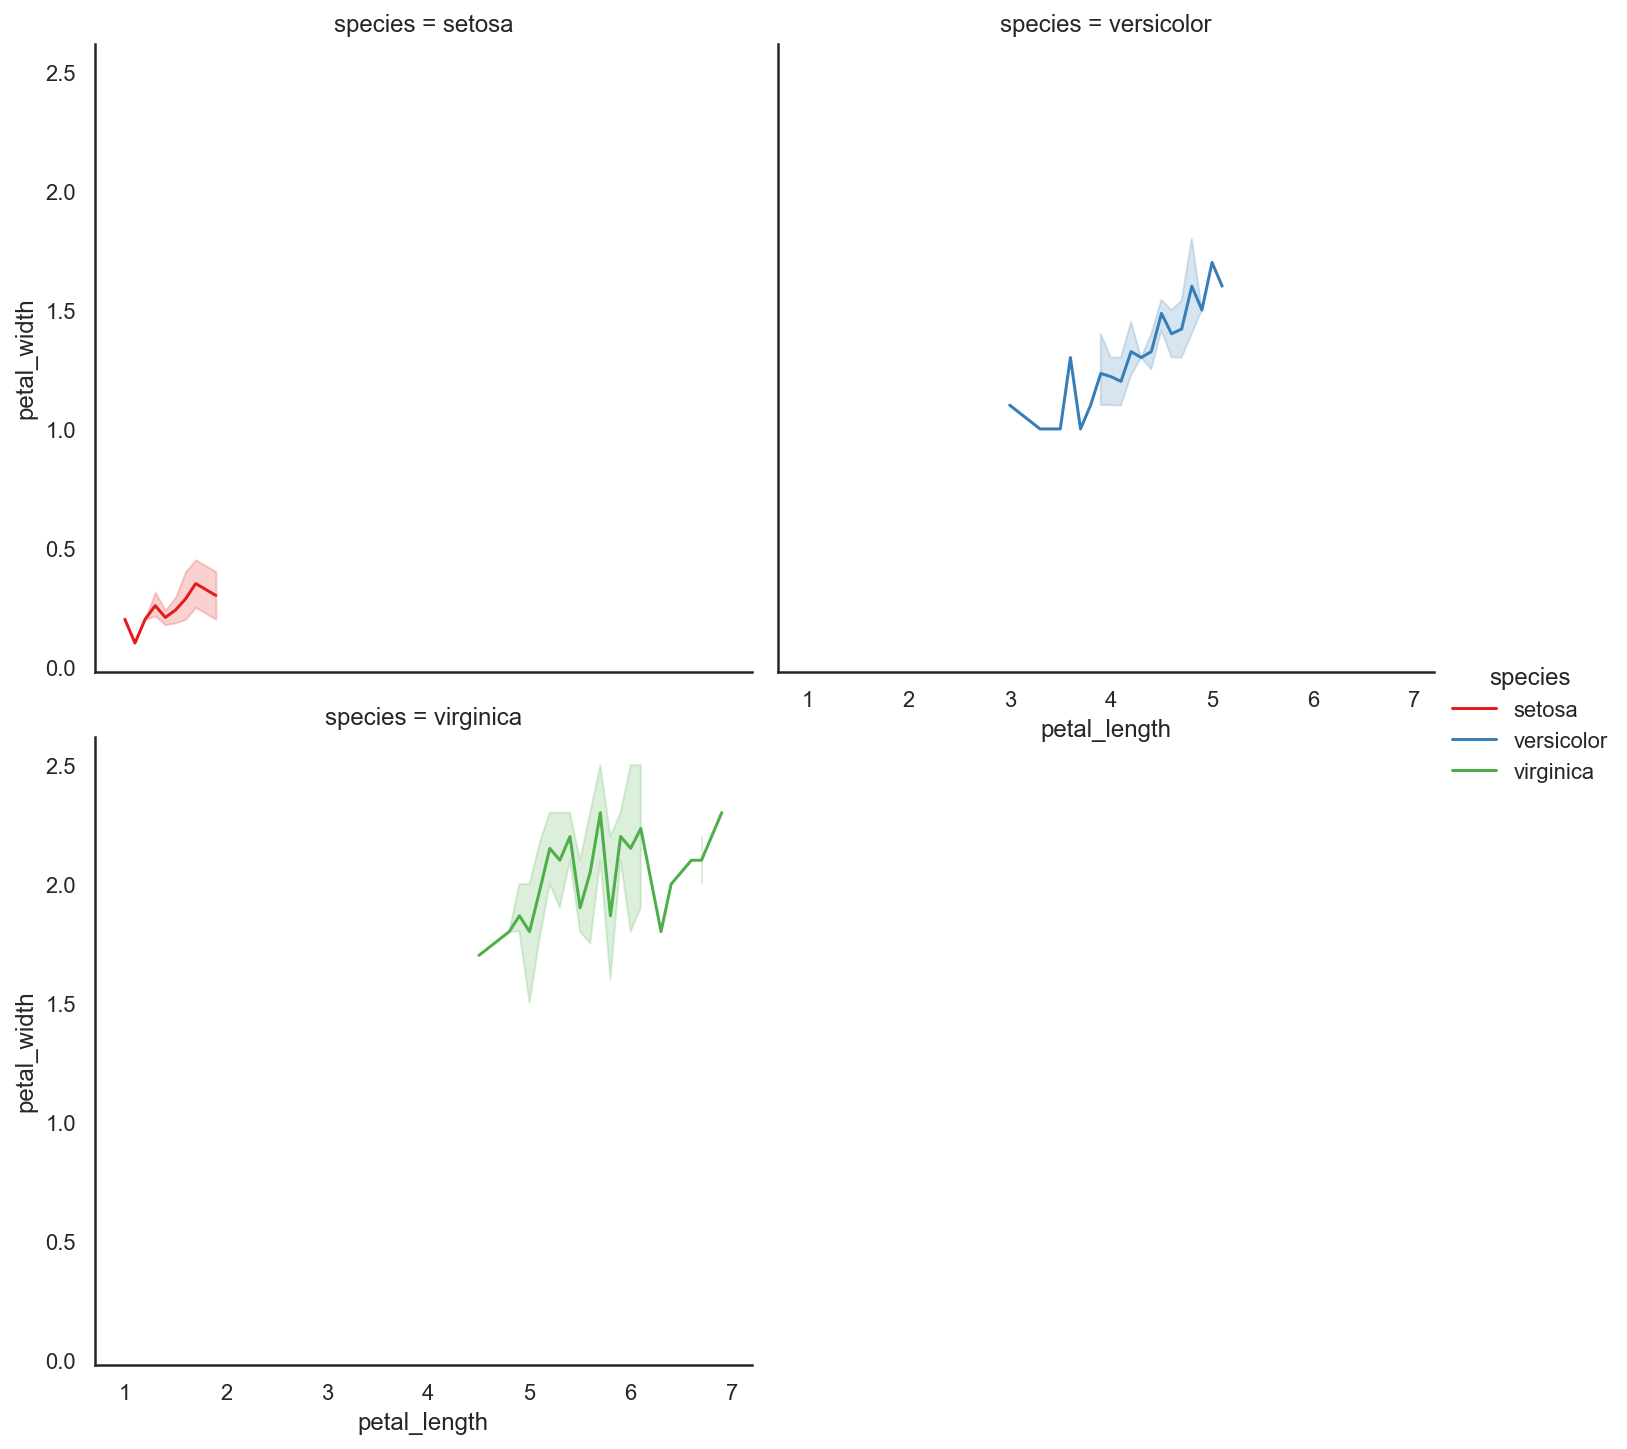

In [50]:
# lineplot을 서브플롯으로(종별) => relplot(관계형 그래프에서 서브플롯을 그리는 함수)
sns.relplot(data=iris, x='petal_length', y='petal_width', hue='species',kind='line',#기본값은 scatter
           col='species', #col 단위로 서브플롯 표현
           col_wrap=2)  #한줄에 표현될 서브플롯 수

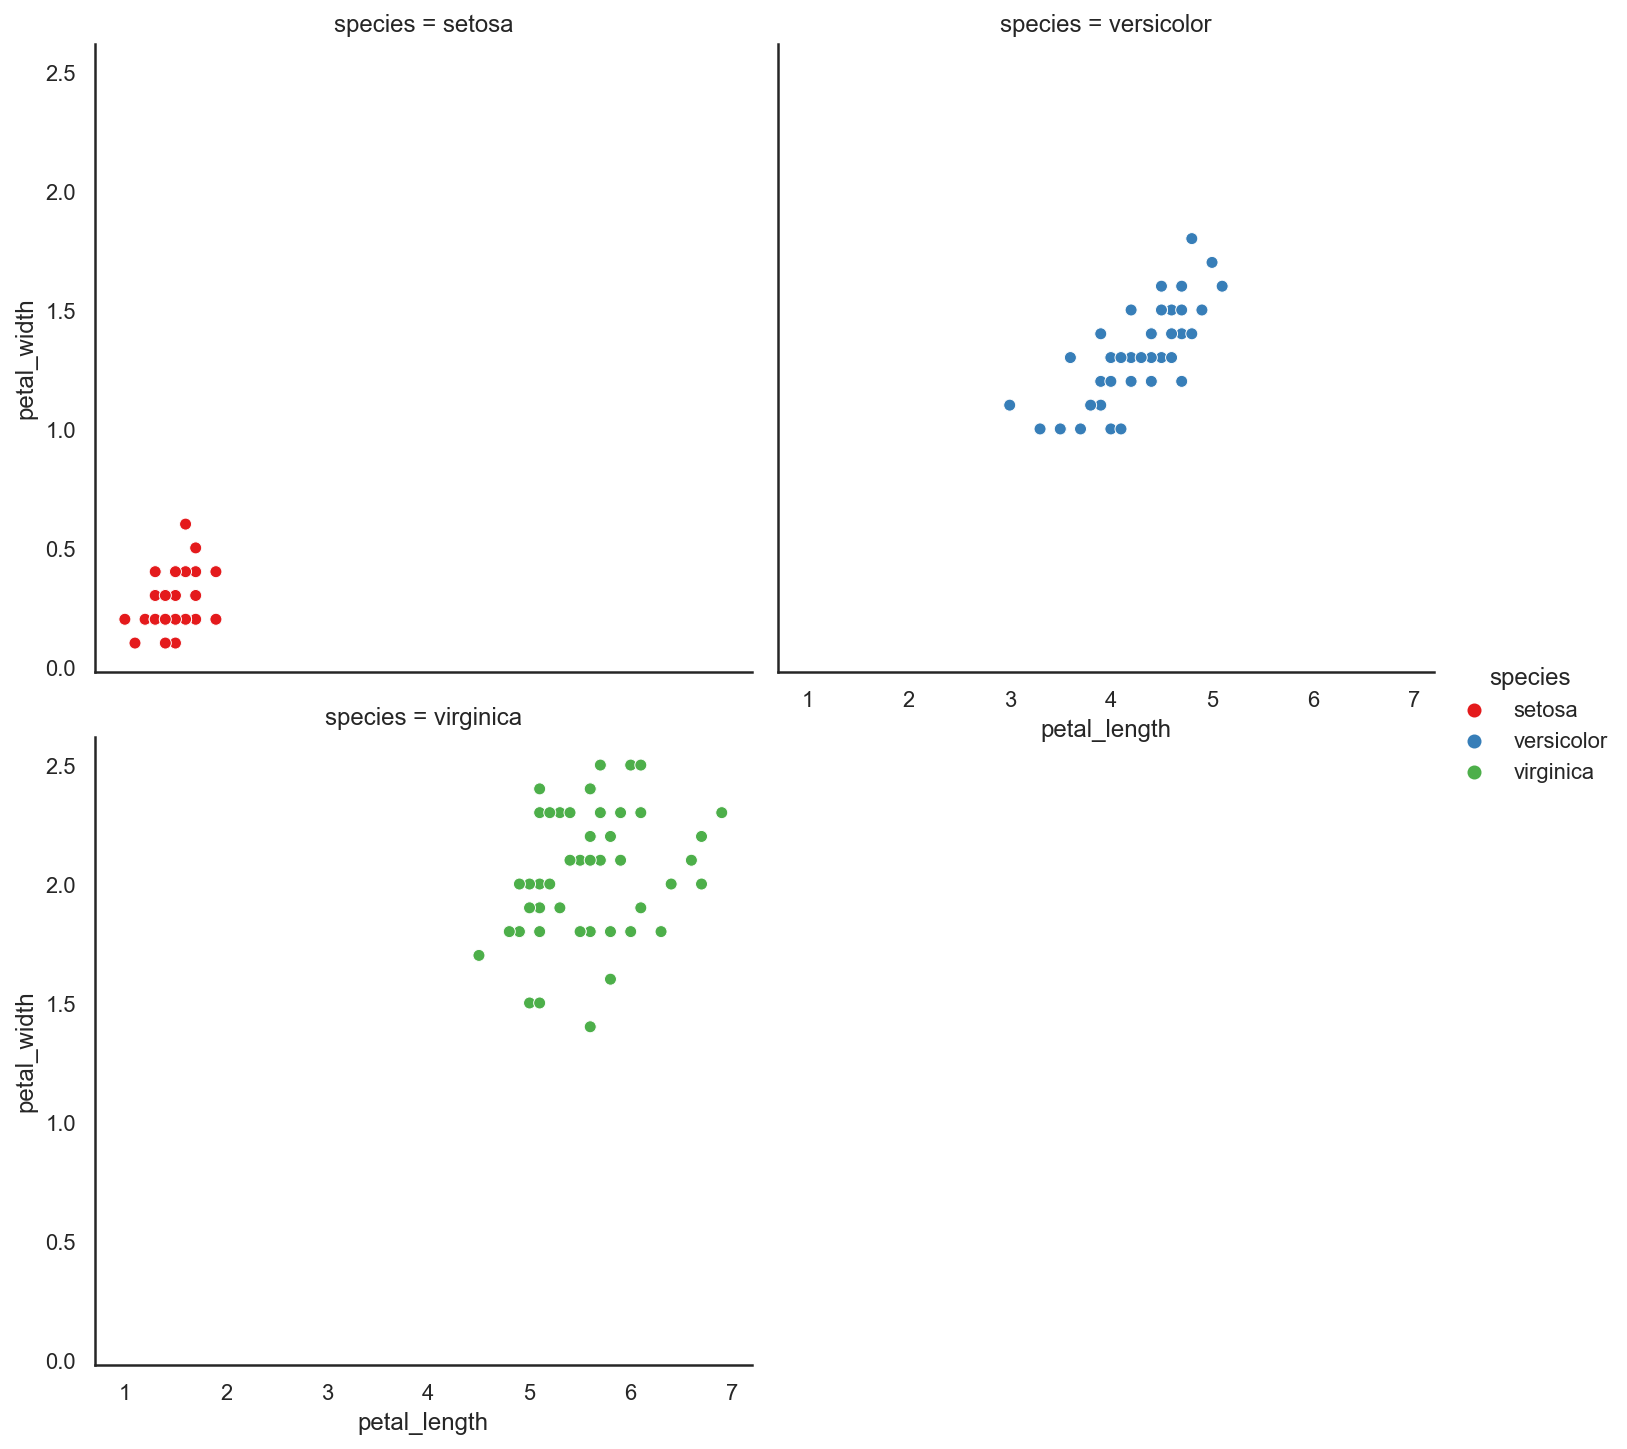

In [51]:
# scatterplot을 서브플롯으로(종별) => relplot(관계형 그래프에서 서브플롯을 그리는 함수)
sns.relplot(data=iris, x='petal_length', y='petal_width', hue='species',kind='scatter',#기본값은 scatter
           col='species', #col 단위로 서브플롯 표현
           col_wrap=2)  #한줄에 표현될 서브플롯 수

### 2) categorical plots: 범주형 그래프

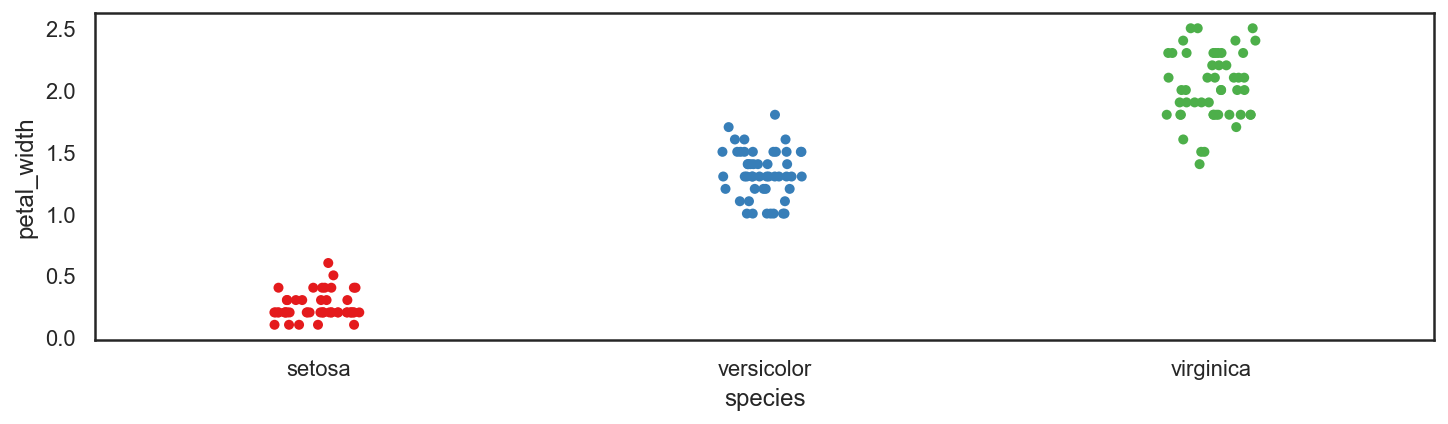

In [54]:
plt.figure(figsize=(12,3))
# 종별 petal_width의 값을 산점도 : x축이 범주형 데이터일 경우 scatterplot 적합하지 않아
# x축이 범주형일때 사용하는 범주형1
sns.stripplot(data=iris, x='species', y='petal_width')
plt.show()


<AxesSubplot:xlabel='species', ylabel='petal_width'>

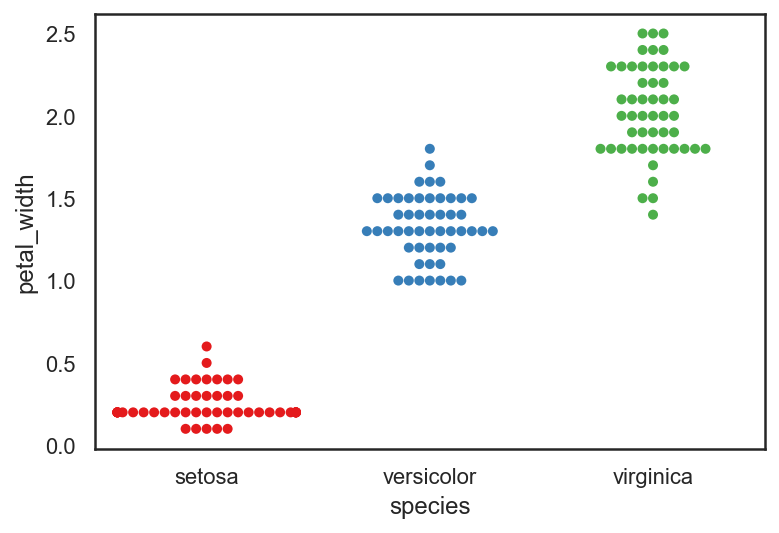

In [57]:
# x축이 범주형일때 사용하는 산점도2 : 산점도들이 중첩되지 않게 
sns.swarmplot(data=iris, x='species', y='petal_width')
#sns.stripplot(data=iris, x='species', y='petal_width', color='b')

<AxesSubplot:xlabel='species', ylabel='petal_width'>

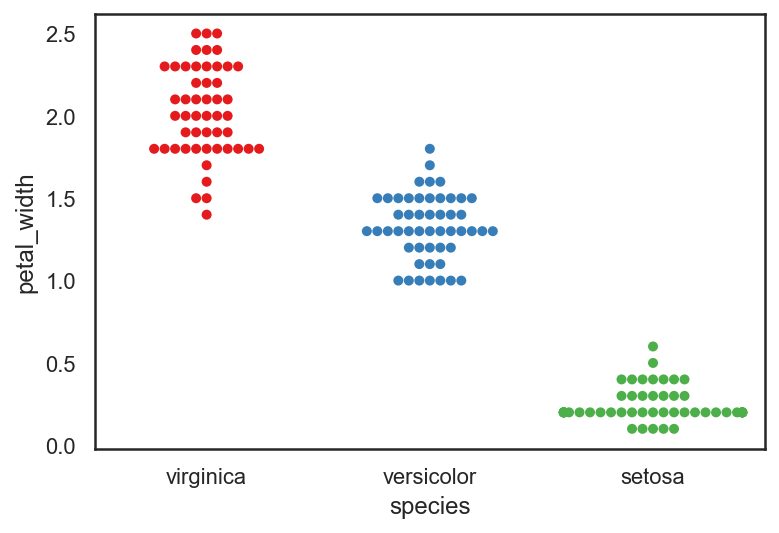

In [58]:
sns.swarmplot(x='species', y='petal_width', data=iris.sort_values('petal_width', ascending=False)) #내림차순 정렬된 데이터

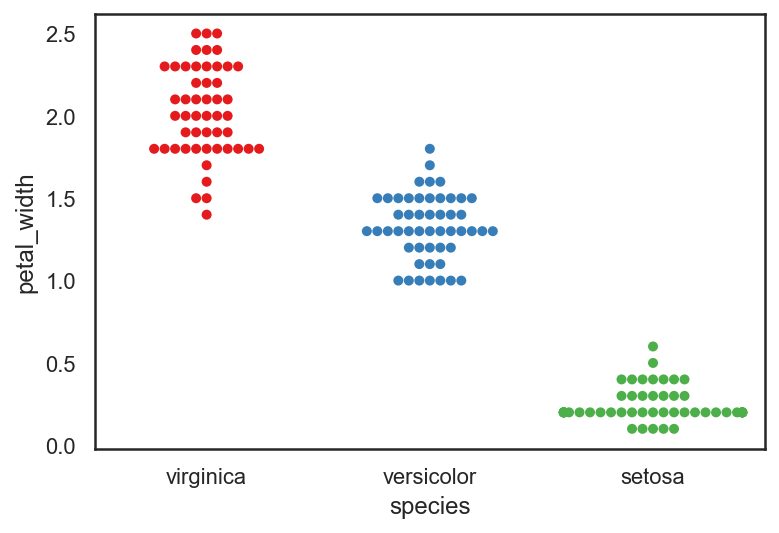

In [59]:
sns.swarmplot(x='species', y='petal_width', data=iris,
              order=['virginica','versicolor','setosa'])
plt.show()

In [60]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


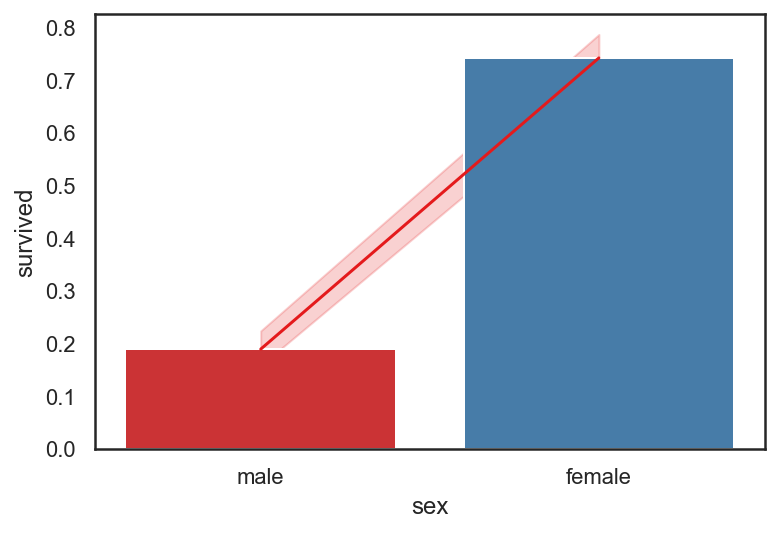

In [67]:
# 성별 survived의 평균을 막대그래프로 
titanic.groupby('sex')['survived'].mean() #matplotlib으로 막대그래프를 그릴 경우 선행작업
sns.barplot(data=titanic, x='sex', y='survived', ci=None)
sns.lineplot(data=titanic, x='sex', y='survived')
plt.show()

In [64]:
titanic.shape

(891, 15)

<AxesSubplot:xlabel='sex', ylabel='survived'>

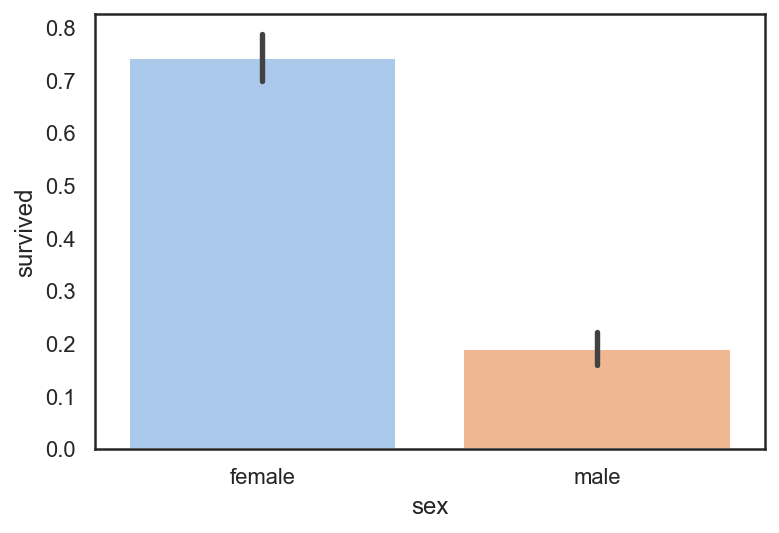

In [68]:
sns.barplot(data=titanic, x='sex', y='survived',
           order=['female','male'],
           palette='pastel')

<AxesSubplot:xlabel='sex', ylabel='survived'>

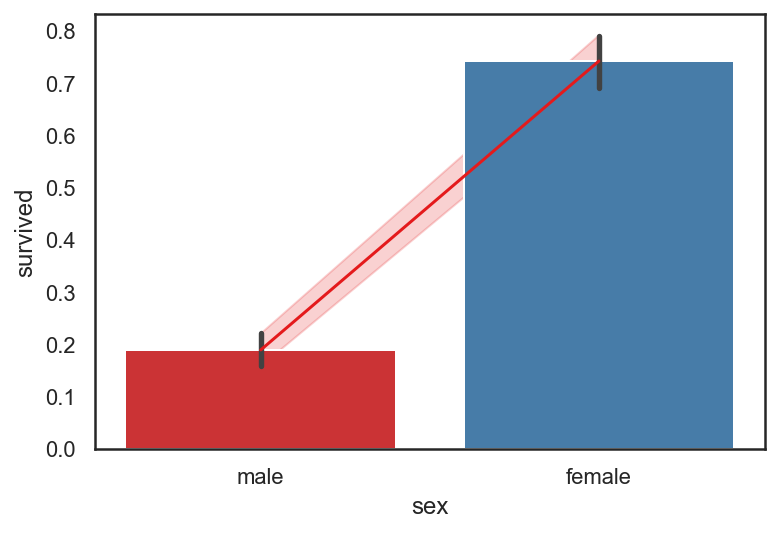

In [69]:
sns.barplot(data=titanic, x='sex', y='survived')
sns.lineplot(data=titanic, x='sex', y='survived')

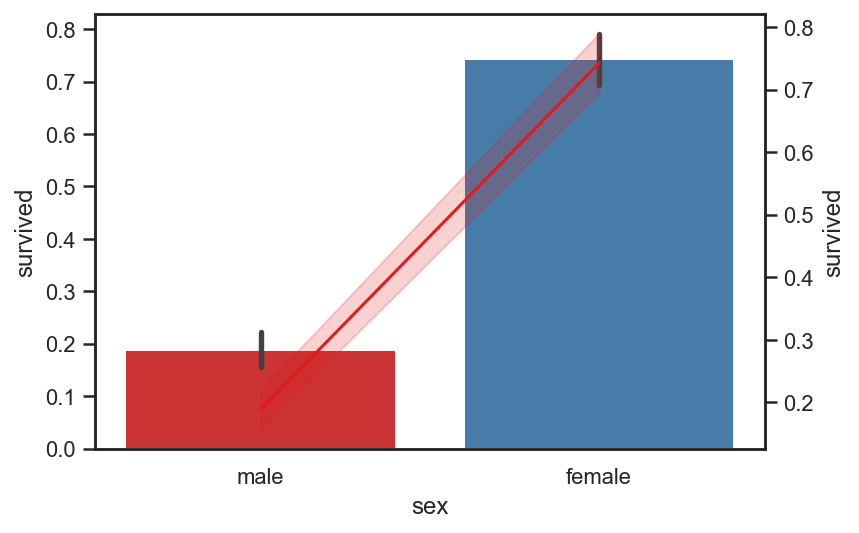

In [74]:
# 축 공유
fig, ax1 = plt.subplots()
sns.barplot(data=titanic, x='sex', y='survived',ax=ax1)
ax2 = ax1.twinx()
sns.lineplot(data=titanic,x='sex', y='survived', ax=ax2)
plt.show()

<AxesSubplot:xlabel='sex', ylabel='survived'>

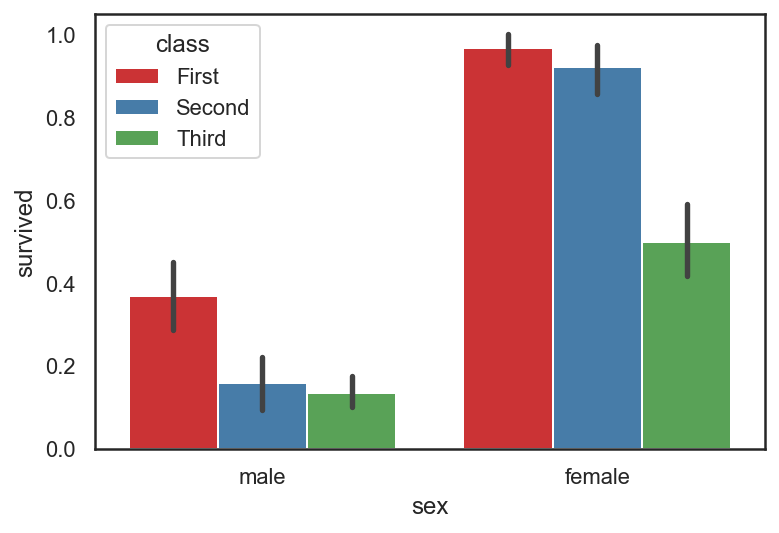

In [72]:
#  class별로 성별 생존률 평균 하나의 막대그래프
sns.barplot(data=titanic, x='sex', y='survived', hue='class')

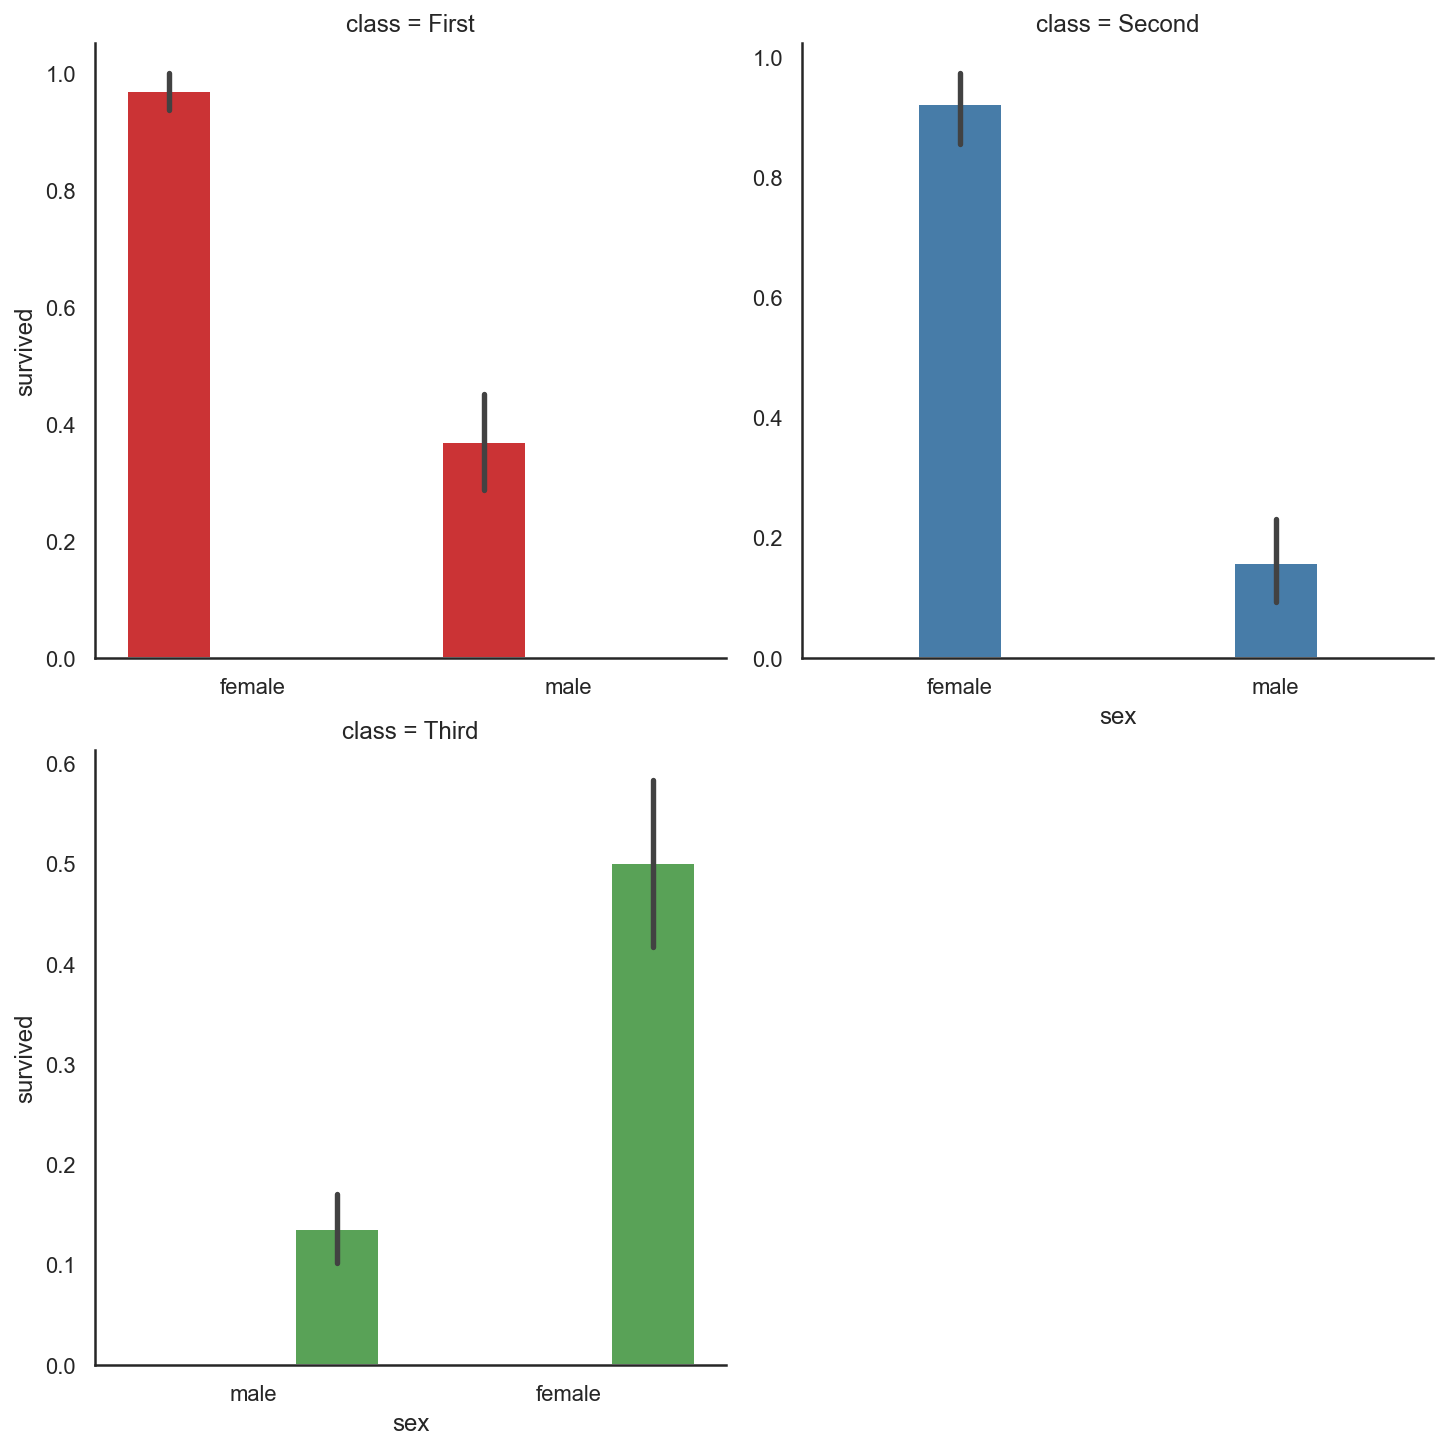

In [79]:
# class별로 성별 생존률 평균 여러개의 막대그래프를 서브플롯
sns.catplot(data=titanic, x='sex', y='survived', hue='class',kind='bar',#기본값은 scatter
           col='class', #col 단위로 서브플롯 표현
           col_wrap=2, sharey=False, sharex=False)  #한줄에 표현될 서브플롯 수

In [80]:
# deck별 관측수를 막대그래프로
titanic.deck.isnull().sum()

688

In [81]:
titanic.deck.head()

0    NaN
1      C
2    NaN
3      C
4    NaN
Name: deck, dtype: category
Categories (7, object): ['A', 'B', 'C', 'D', 'E', 'F', 'G']

<AxesSubplot:xlabel='deck', ylabel='count'>

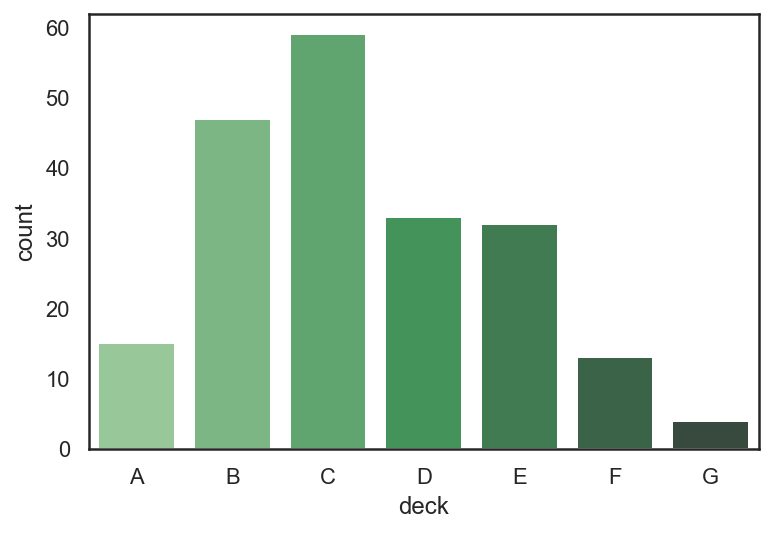

In [84]:
# deck별 관측수를 막대그래프로
sns.countplot(data=titanic, x='deck',palette='Greens_d')

<AxesSubplot:xlabel='class', ylabel='survived'>

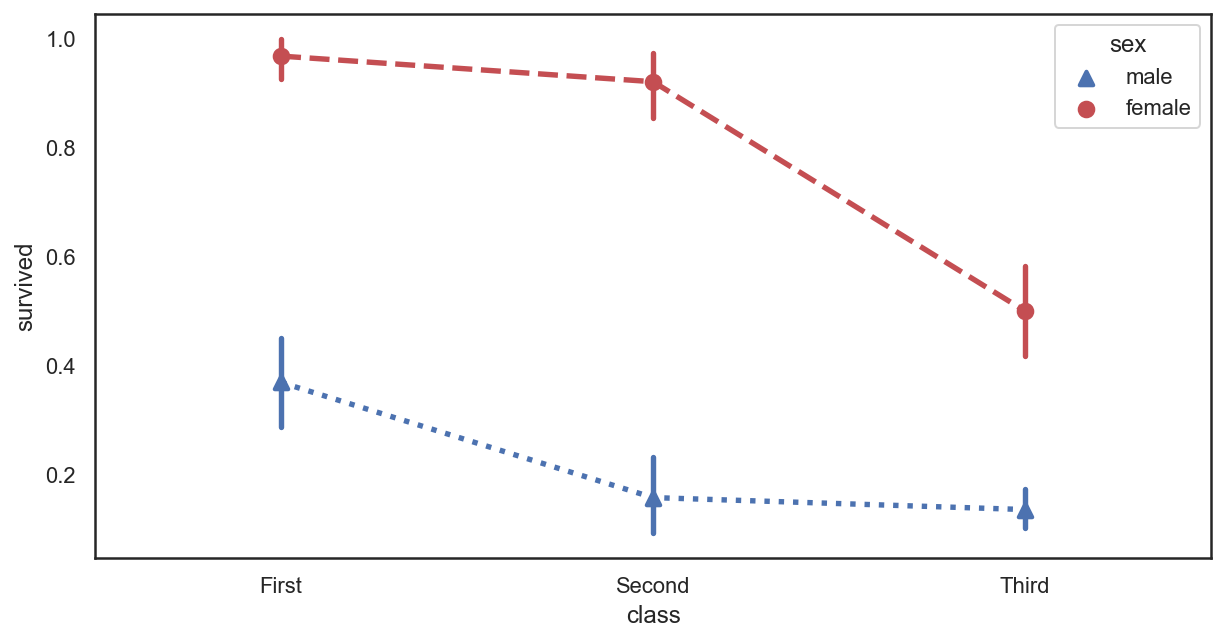

In [87]:
# class별 survived값을 sex별로 pointplot
plt.figure(figsize=(10,5))
sns.pointplot(data=titanic, x="class", y="survived", hue='sex',
              palette={'male':'b','female':'r'},
              markers=['^','o'],
              linestyles=[':','--'])

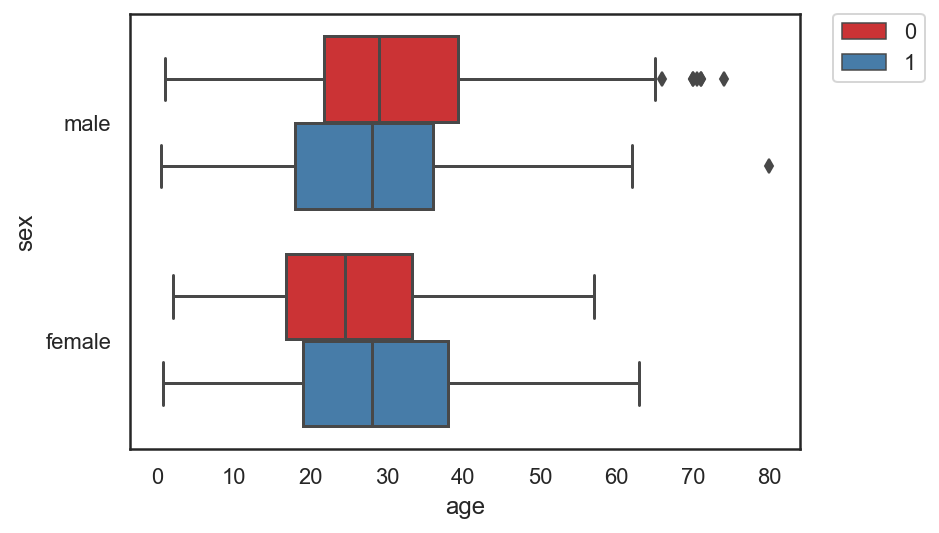

In [91]:
# boxplot, boxenplot ,voilinplot
sns.boxplot(data=titanic, x='age', y='sex', hue='survived')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

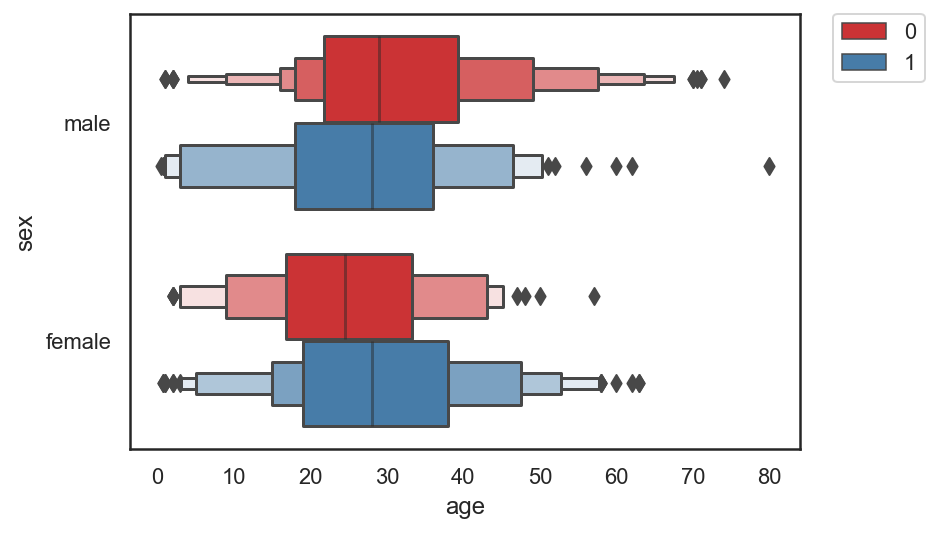

In [92]:
# boxplot, boxenplot ,voilinplot
sns.boxenplot(data=titanic, x='age', y='sex', hue='survived')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

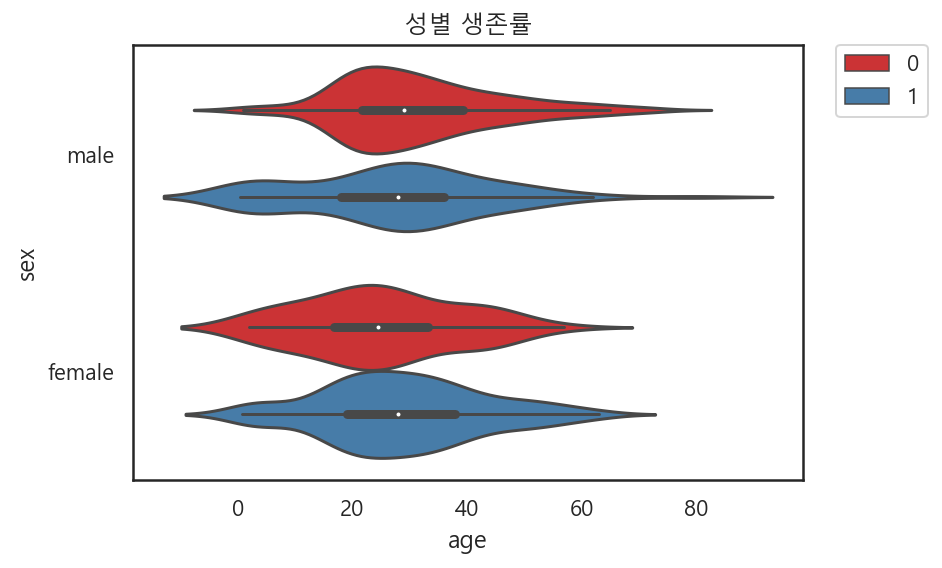

In [96]:
# boxplot, boxenplot ,voilinplot
#한글설정
plt.rc('font', family='Malgun Gothic')
g=sns.violinplot(data=titanic, x='age', y='sex', hue='survived')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
g.set(title='성별 생존률')
plt.show()

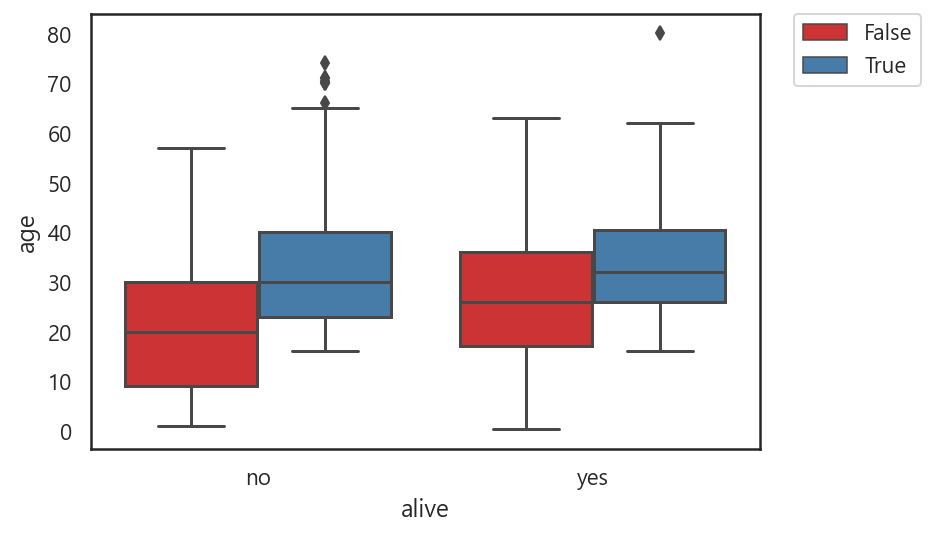

In [98]:
sns.boxplot(data=titanic, x='alive', y='age', hue='adult_male')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

### 3) 쌍관계 그래프

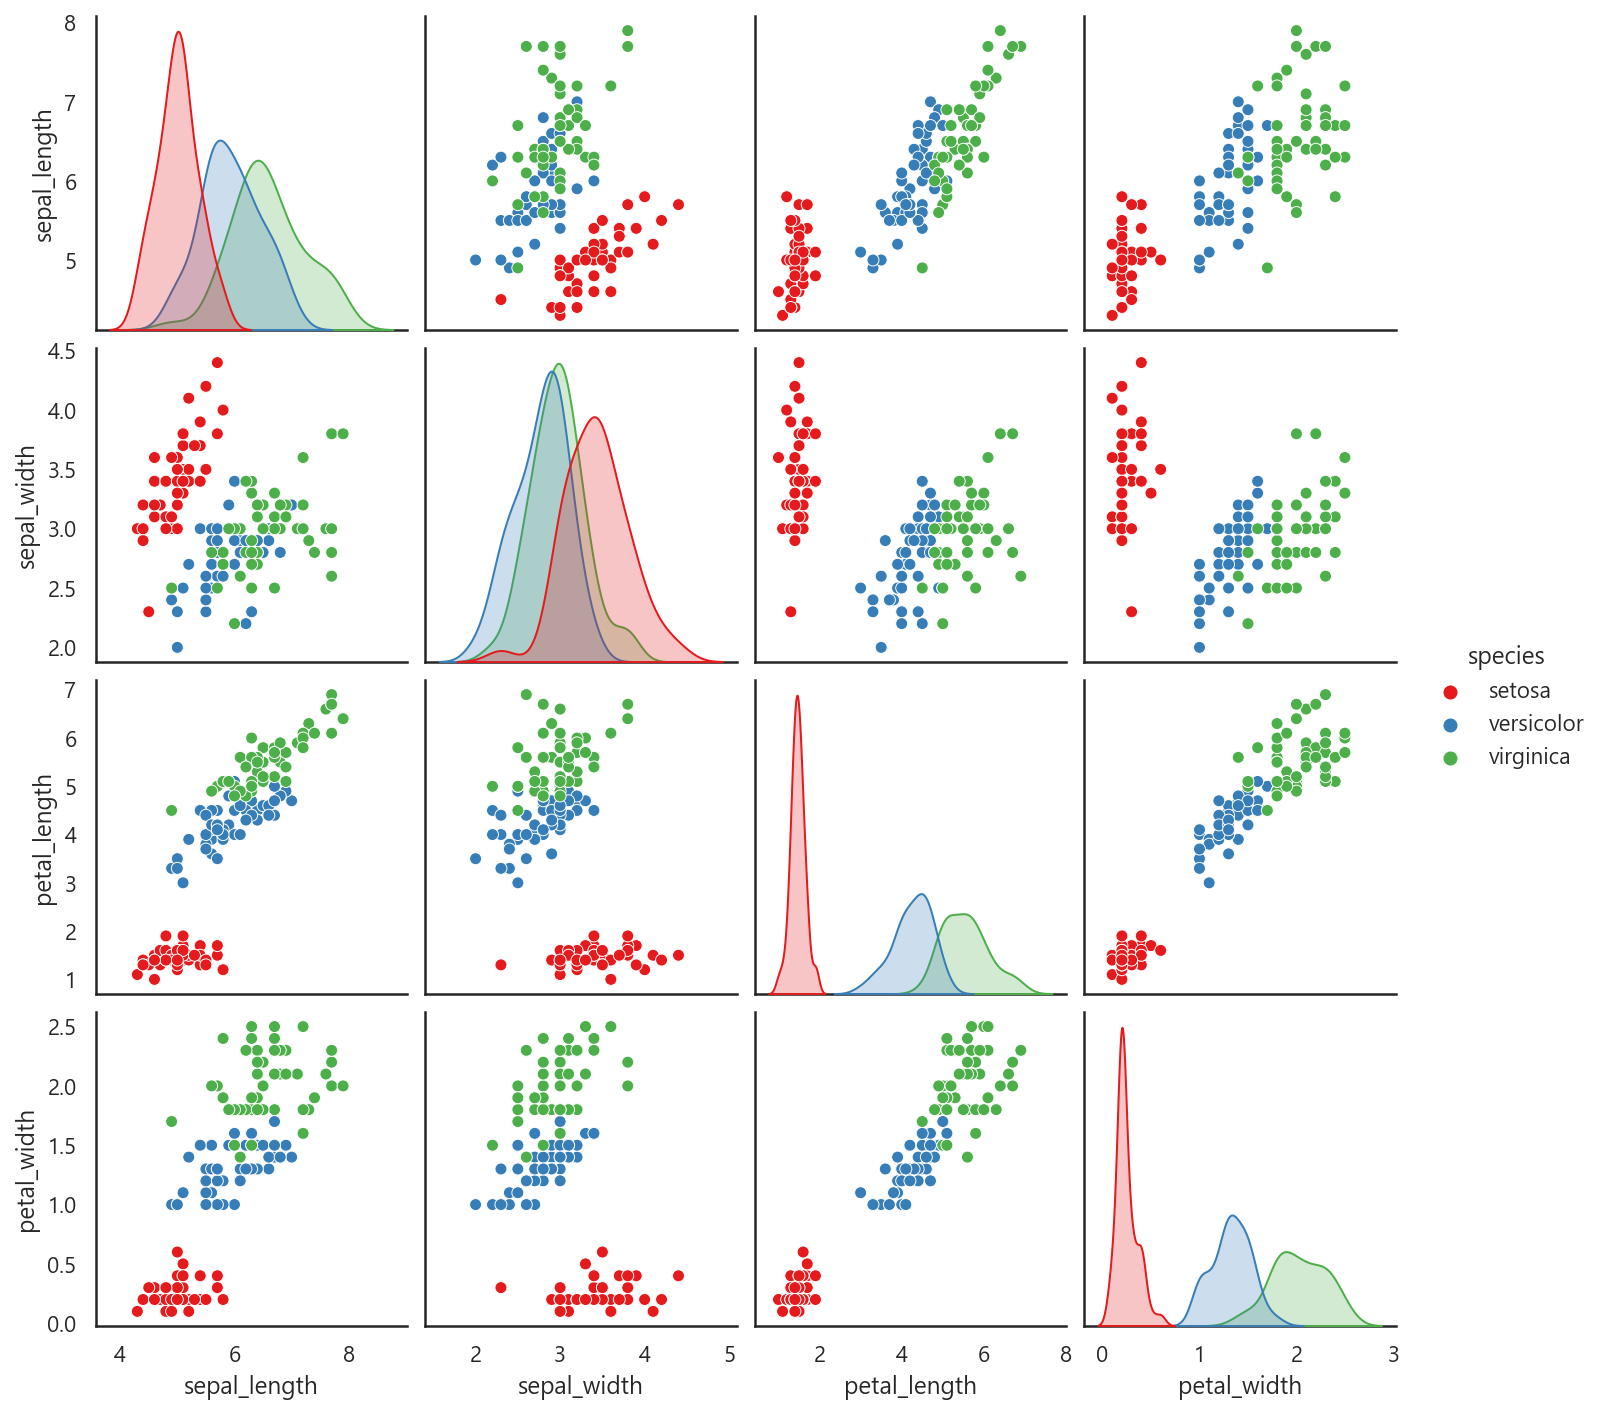

In [100]:
sns.pairplot(data=iris, hue='species')

### 4) 밀도 그래프

In [106]:
x = np.random.randn(10000)

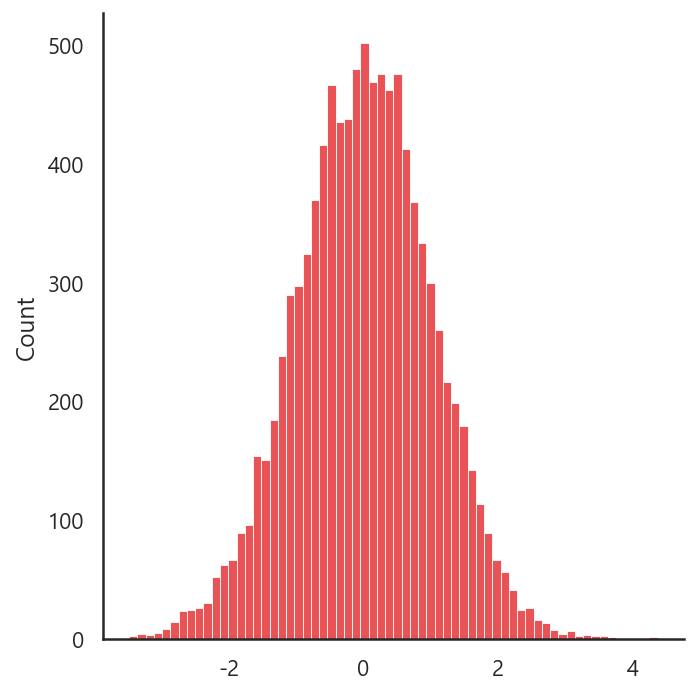

In [107]:
sns.displot(x, kde=False)

### 5)회귀 그래프

In [108]:
iris.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [111]:
r = iris.corr()
r

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


<AxesSubplot:>

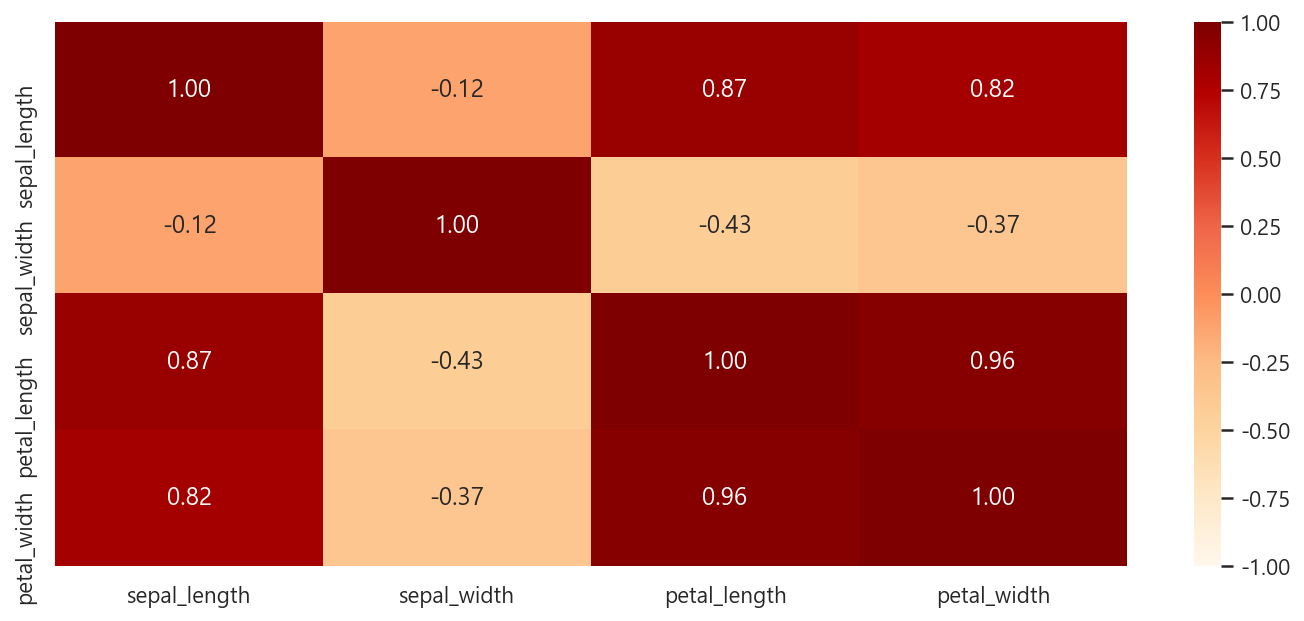

In [117]:
plt.figure(figsize=(12,5))
sns.heatmap(r, vmin=-1, vmax=1, annot=True, cmap='OrRd', fmt='.2f')

<AxesSubplot:xlabel='petal_length', ylabel='petal_width'>

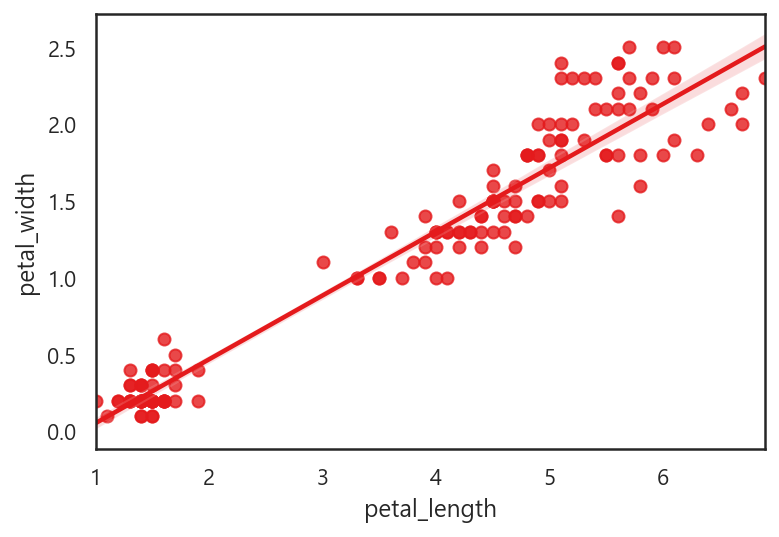

In [118]:
#회귀 모형을 만드는 함수 : regplot(hue사용불가), lmplot(서브플롯가능)
sns.regplot(data=iris, x="petal_length", y="petal_width")

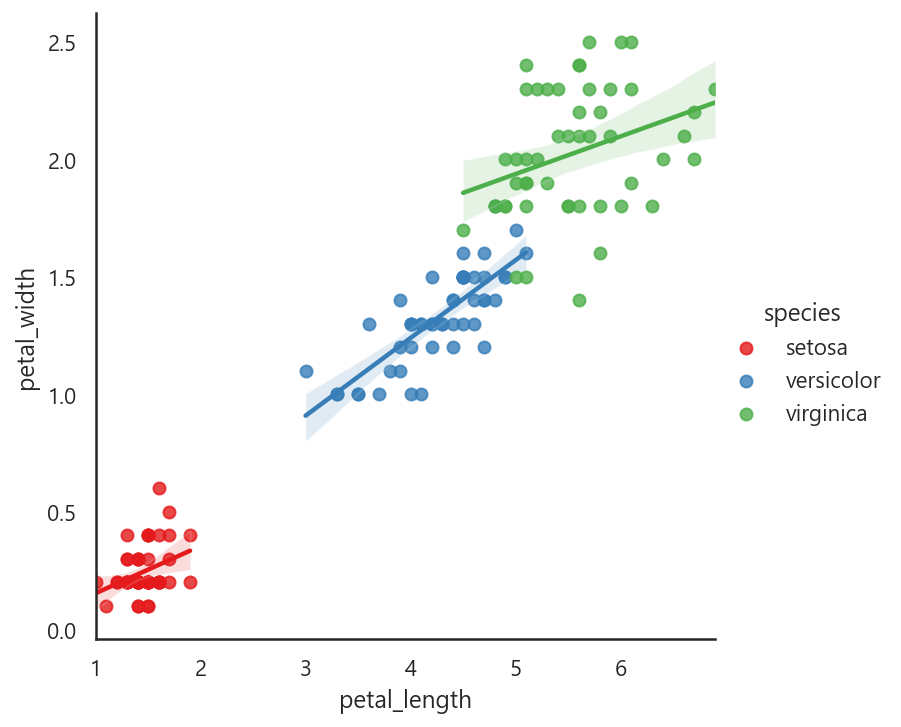

In [120]:
sns.lmplot(data=iris, x="petal_length", y="petal_width", hue='species')

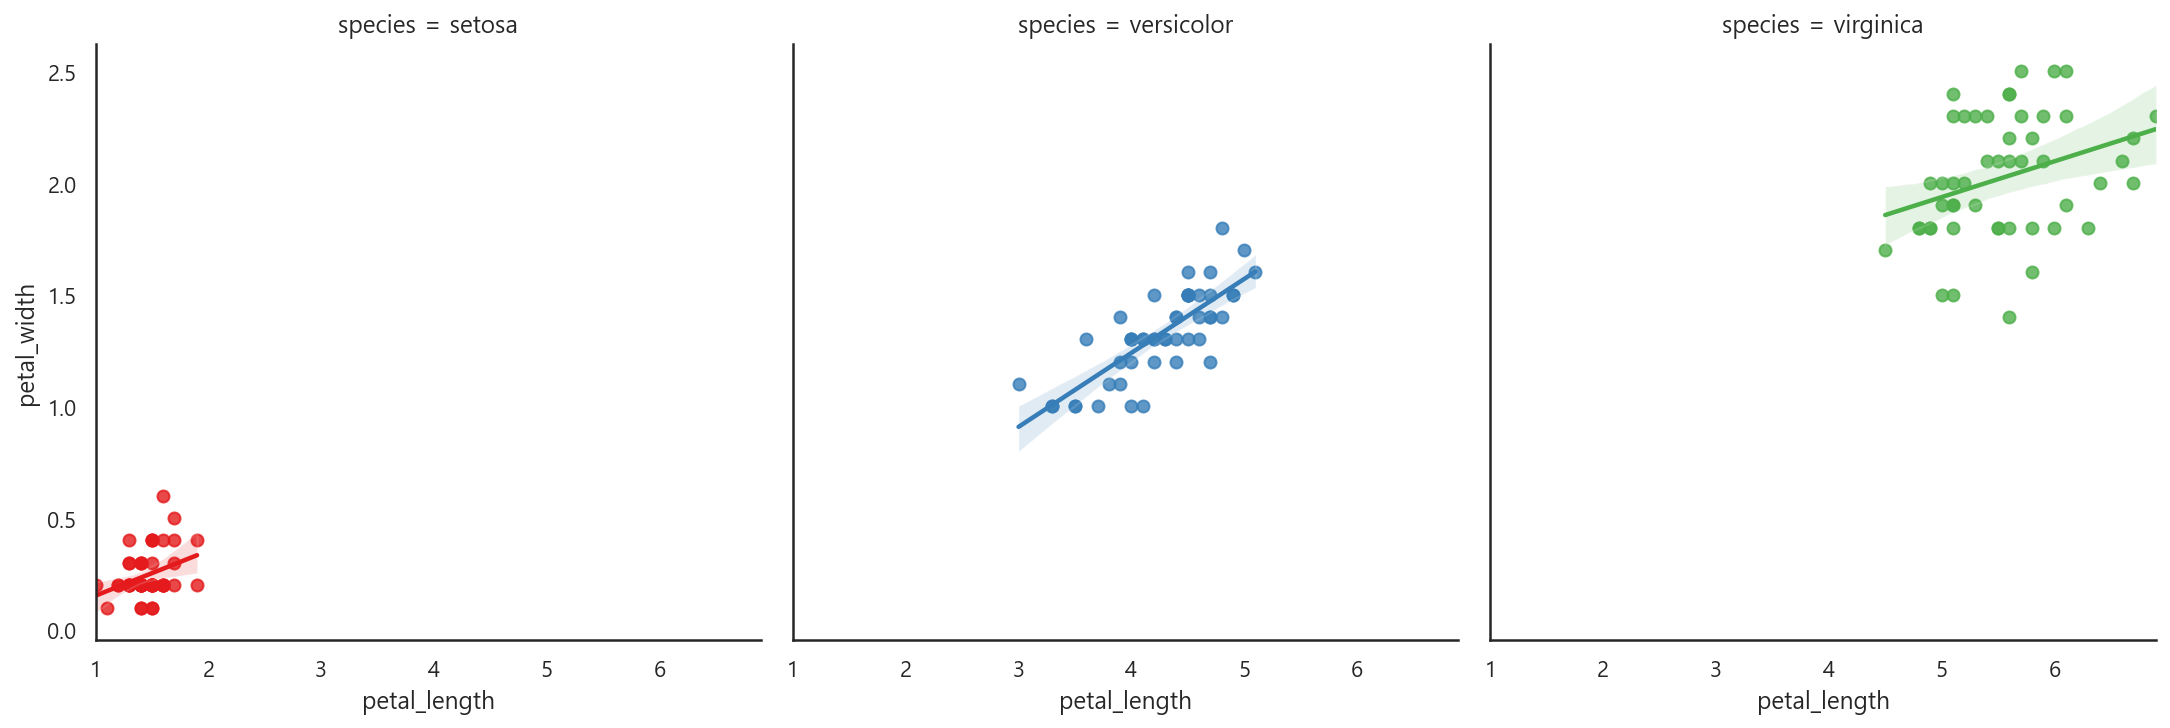

In [121]:
sns.lmplot(data=iris, x='petal_length', y='petal_width', hue='species', col='species', col_wrap=3)

## 3.4 다중 그래프를 위한  FacetGrid
- https://seaborn.pydata.org/tutorial/axis_grids.html#conditional-small-multiples

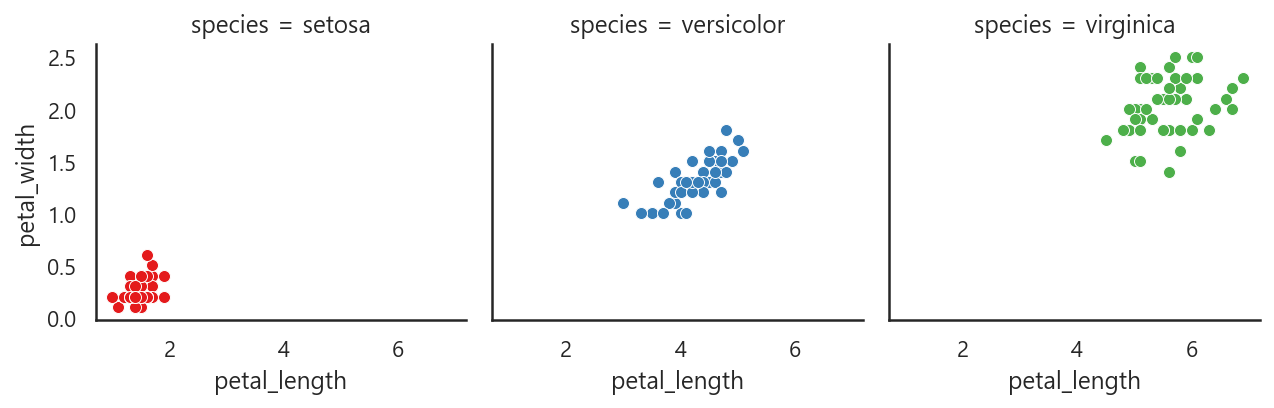

In [123]:
g = sns.FacetGrid(iris, col="species", hue='species')
g.map(sns.scatterplot, "petal_length","petal_width")
plt.savefig("파일이름.png")

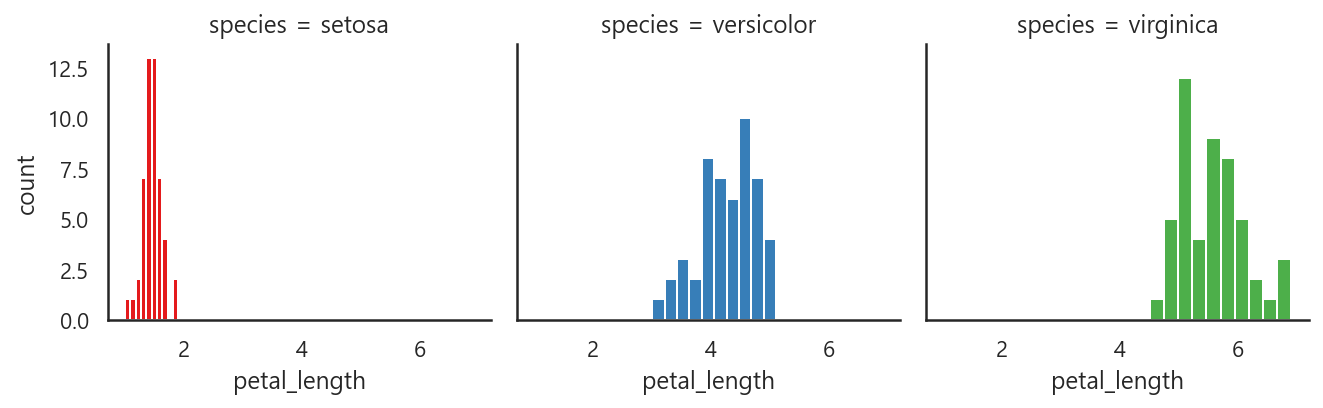

In [126]:
g = sns.FacetGrid(iris, col="species", hue='species')
g.map(plt.hist, "petal_length")
g.set_axis_labels(y_var='count')
plt.show()